In [1]:
# Import the relevant packages and define the dataset:

from copy import deepcopy
import numpy as np
x = np.array([[1,1]])
y = np.array([[0]])

In [2]:
# Initialize the weight and bias values randomly

W = [
 np.array([[-0.0053, 0.3793],
 [-0.5820, -0.5204],
 [-0.2723, 0.1896]], dtype=np.float32).T,
 np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
 np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T,
 np.array([-0.5516], dtype=np.float32)
]

-  The hidden layer has three units in it and each input node is connected to
each of the hidden layer units. Hence, there are a total of six weight values
and three bias values – one bias and two weights (two weights coming from
two input nodes) corresponding to each of the hidden units. Additionally,
the final layer has one unit that is connected to the three units of the hidden
layer. Hence, a total of three weights and one bias dictate the value of the
output layer.

- The first array of parameters correspond to the 2 x 3
matrix of weights that connect the input layer to the hidden layer. The
second array of parameters represent the bias values associated with each
node of the hidden layer. The third array of parameters correspond to the 3
x 1 matrix of weights joining the hidden layer to the output layer, and the
final array of parameters represents the bias associated with the output
layer.


In [3]:
# Define the feed_forward function:

def feed_forward(inputs, outputs, weights):
 pre_hidden = np.dot(inputs,weights[0])+ weights[1]
 hidden = 1/(1+np.exp(-pre_hidden))
 pred_out = np.dot(hidden, weights[2]) + weights[3]
 mean_squared_error = np.mean(np.square(pred_out \
 - outputs))
 return mean_squared_error

In [10]:
# Define the update_weights function

def update_weights(inputs, outputs, weights, lr):
  original_weights = deepcopy(weights)
  temp_weights = deepcopy(weights)
  updated_weights = deepcopy(weights)
  original_loss = feed_forward(inputs, outputs, original_weights)
  for i, layer in enumerate(original_weights):
    for index, weight in np.ndenumerate(layer):
      temp_weights = deepcopy(weights)
      temp_weights[i][index] += 0.0001
      _loss_plus = feed_forward(inputs, outputs,temp_weights)
      grad = (_loss_plus - original_loss)/(0.0001)
      updated_weights[i][index] -= grad*lr
  return updated_weights, original_loss



In [11]:
# Update weights over 100 epochs and fetch the loss value and the updated weight values:

losses = []
for epoch in range(100):
 W, loss = update_weights(x,y,W,0.01)
 losses.append(loss)

Text(0, 0.5, 'Loss value')

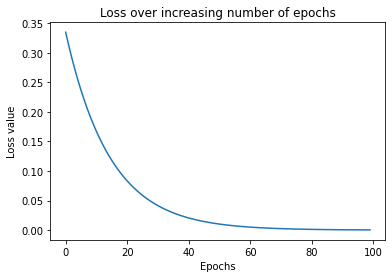

In [12]:
# Plot the loss values:

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss value')

In [15]:
# Once we have the updated weights, make the predictions for the input by passing the input through the network and calculate the output value:
pre_hidden = np.dot(x,W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
pred_out = np.dot(hidden, W[2]) + W[3]

pred_out

array([[-0.0174781]])